In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from itertools import combinations
import itertools


In [22]:
allFeatures_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\all_fatures\custom_merged_20231117.csv"
allFeatures = pd.read_csv(allFeatures_file_path)
allFeatures = pd.DataFrame(allFeatures)

# right_volume_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Volumetric_Analysis\rh_aparc_volume_20231117.csv"
# right_volume = pd.read_csv(right_volume_file_path)
# right_volume = pd.DataFrame(right_volume)


C:\Users\fargor\AppData\Local\Temp\ipykernel_11716\407662797.py:2: DtypeWarning: Columns (15,16,17,23,25,29,30,31,32,34,35,36,37,38,39,40,45,46,47,48,49,50,51,52,53,150,173,212,237,338,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,390,391,392,393,394,395,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,435,436,437,438,439,440,441,442,443,444,445,446,449,484,533,534,535,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,607,608,609,610,611,614,615,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645

In [23]:
allFeatures.head()


,subject_id,visit,checkin_bin,exposurebin,age_decade,racecat_combined,eduyears,totyr_foot,chiiseas_pf,chiiyrs_pf,...,stroketiaepi,stroketiaagefirst,stroketiaagerec,stroketiaprob,stroketiaprobdes,endarter,endarterage,bp_systolic,bp_diastolic,rFSRP
0,1001.0,1.0,2.0,1.0,1.0,5.0,16.0,7,4335.4,2167.7,...,.,.,.,.,NaN,0.0,.,131.0,81.0,0.01052
1,1002.0,1.0,2.0,1.0,1.0,5.0,15.0,14,10363.1,5708.1,...,.,.,.,.,NaN,0.0,.,135.0,74.0,0.01952
2,1003.0,1.0,2.0,1.0,1.0,5.0,18.0,12,6685.4,4863.9,...,.,.,.,.,NaN,0.0,.,135.0,89.0,0.01769
3,1004.0,1.0,1.0,1.0,2.0,5.0,16.0,16,7701.2,6448.9,...,.,.,.,.,NaN,0.0,.,117.0,82.0,0.01367
4,1005.0,1.0,3.0,0.0,2.0,5.0,21.0,.,.,.,...,.,.,.,.,NaN,0.0,.,148.0,94.0,0.03794


In [24]:
print("Column Names:")
print(allFeatures.columns[2])

Column Names:
checkin_bin


In [25]:
#group them base on the value in the third column which indicates their level of playing
allFeatures_grouped = allFeatures.groupby(allFeatures.iloc[:, 2])

NFL_allFeatures_grouped = pd.DataFrame()
CP_allFeatures_grouped = pd.DataFrame()
HC_allFeatures_grouped = pd.DataFrame()


# group_name : 1, 2, 3   group_data: 
for group_name, group_data in allFeatures_grouped:
    if group_name == 1:
        NFL_allFeatures_grouped = pd.concat([NFL_allFeatures_grouped,group_data], ignore_index = True)
    if group_name == 2:
        CP_allFeatures_grouped = pd.concat([CP_allFeatures_grouped,group_data], ignore_index = True)
    if group_name == 3:
        HC_allFeatures_grouped = pd.concat([HC_allFeatures_grouped,group_data], ignore_index = True)
    
#print("DataFrame for NFL:")
#print(NFL_right_grouped.head())
NFL_allFeatures_grouped.head()


,subject_id,visit,checkin_bin,exposurebin,age_decade,racecat_combined,eduyears,totyr_foot,chiiseas_pf,chiiyrs_pf,...,stroketiaepi,stroketiaagefirst,stroketiaagerec,stroketiaprob,stroketiaprobdes,endarter,endarterage,bp_systolic,bp_diastolic,rFSRP
0,1004.0,1.0,1.0,1.0,2.0,5.0,16.0,16,7701.2,6448.9,...,.,.,.,.,NaN,0.0,.,117.0,82.0,0.01367
1,1008.0,1.0,1.0,1.0,2.0,3.0,15.0,22,8220.9,5421.2,...,.,.,.,.,NaN,0.0,.,133.0,78.0,0.02836
2,1011.0,1.0,1.0,1.0,2.0,5.0,16.0,20,9307,9307,...,.,.,.,.,NaN,0.0,.,135.0,79.0,0.04273
3,1015.0,1.0,1.0,1.0,1.0,3.0,19.0,17,9866.7,6173.3,...,.,.,.,.,NaN,0.0,.,120.0,64.0,0.00905
4,1018.0,1.0,1.0,1.0,1.0,3.0,16.0,23,10635.9,7929.6,...,.,.,.,.,NaN,0.0,.,132.0,85.0,0.00932


In [26]:
index_of_chiiyrs_pg = NFL_allFeatures_grouped.columns.get_loc("chiiyrs_pg")
NFL_allFeatures_grouped.drop(columns=NFL_allFeatures_grouped.columns[[1] +list(range(3,index_of_chiiyrs_pg+1))], inplace = True)
CP_allFeatures_grouped.drop(columns=CP_allFeatures_grouped.columns[[1] +list(range(3,index_of_chiiyrs_pg+1))], inplace = True)
HC_allFeatures_grouped.drop(columns=HC_allFeatures_grouped.columns[[1] +list(range(3,index_of_chiiyrs_pg+1))], inplace = True)

NFL_allFeatures_grouped.head()


,subject_id,checkin_bin,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,DEM_AD8_ThinkMem,...,stroketiaepi,stroketiaagefirst,stroketiaagerec,stroketiaprob,stroketiaprobdes,endarter,endarterage,bp_systolic,bp_diastolic,rFSRP
0,1004.0,1.0,0.0,0,0,0,0.0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,117.0,82.0,0.01367
1,1008.0,1.0,0.0,0,0,0,0.0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,133.0,78.0,0.02836
2,1011.0,1.0,1.0,1,1,1,0.0,0.0,1.0,1.0,...,.,.,.,.,NaN,0.0,.,135.0,79.0,0.04273
3,1015.0,1.0,0.0,0,0,0,0.0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,120.0,64.0,0.00905
4,1018.0,1.0,1.0,1,1,0,0.0,0.0,0.0,1.0,...,.,.,.,.,NaN,0.0,.,132.0,85.0,0.00932


In [27]:
#combine all three classes
combined_allFeatures = pd.concat([NFL_allFeatures_grouped, CP_allFeatures_grouped, HC_allFeatures_grouped], ignore_index=True)

combined_allFeatures.head()

,subject_id,checkin_bin,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,DEM_AD8_ThinkMem,...,stroketiaepi,stroketiaagefirst,stroketiaagerec,stroketiaprob,stroketiaprobdes,endarter,endarterage,bp_systolic,bp_diastolic,rFSRP
0,1004.0,1.0,0.0,0,0,0,0.0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,117.0,82.0,0.01367
1,1008.0,1.0,0.0,0,0,0,0.0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,133.0,78.0,0.02836
2,1011.0,1.0,1.0,1,1,1,0.0,0.0,1.0,1.0,...,.,.,.,.,NaN,0.0,.,135.0,79.0,0.04273
3,1015.0,1.0,0.0,0,0,0,0.0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,120.0,64.0,0.00905
4,1018.0,1.0,1.0,1,1,0,0.0,0.0,0.0,1.0,...,.,.,.,.,NaN,0.0,.,132.0,85.0,0.00932


In [28]:
# Replace '.' with NaN
combined_allFeatures = combined_allFeatures.replace('.', np.nan)

# Convert all columns to numeric, forcing non-convertible values to NaN
for column in combined_allFeatures.columns:
    combined_allFeatures[column] = pd.to_numeric(combined_allFeatures[column], errors='coerce')

In [29]:
combined_allFeatures.head()

,subject_id,checkin_bin,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,DEM_AD8_ThinkMem,...,stroketiaepi,stroketiaagefirst,stroketiaagerec,stroketiaprob,stroketiaprobdes,endarter,endarterage,bp_systolic,bp_diastolic,rFSRP
0,1004.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,117.0,82.0,0.01367
1,1008.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,133.0,78.0,0.02836
2,1011.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,135.0,79.0,0.04273
3,1015.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.0,64.0,0.00905
4,1018.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,132.0,85.0,0.00932


In [30]:
# Remove columns with >10 NaNs
print("Size before:", combined_allFeatures.shape)

nan_counts = combined_allFeatures.isna().sum()

columns_to_drop = nan_counts[nan_counts > 15].index

combined_allFeatures_filtered = combined_allFeatures.drop(columns=columns_to_drop)

print("Size after:", combined_allFeatures_filtered.shape)
combined_allFeatures = combined_allFeatures_filtered
print("Size after:", combined_allFeatures.shape)


Size before: (236, 7061)
Size after: (236, 4364)
Size after: (236, 4364)


In [31]:
combined_allFeatures.head()

,subject_id,checkin_bin,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,DEM_AD8_ThinkMem,...,stroketia,stroketiatype___1,stroketiatype___2,stroketiatype___3,stroketiatype___999,stroketiatype___777,endarter,bp_systolic,bp_diastolic,rFSRP
0,1004.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,82.0,0.01367
1,1008.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.0,78.0,0.02836
2,1011.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,79.0,0.04273
3,1015.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,64.0,0.00905
4,1018.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,85.0,0.00932


In [32]:
# Remove NaNs
# print("Size before:", combined_allFeatures.shape)
# combined_allFeatures.dropna(inplace=True)
# print("Size after:", combined_allFeatures.shape)

In [33]:
#combined_allFeatures.head()

In [39]:
# Replace NaNs with means
print("Size before:", combined_allFeatures.shape)
combined_allFeatures.fillna(combined_allFeatures.mean(), inplace=True)
print("Size after:", combined_allFeatures.shape)

Size before: (236, 4364)
Size after: (236, 4364)


In [35]:
numerical_combined_allFeatures = combined_allFeatures.select_dtypes(include=['number'])
numerical_combined_allFeatures.head()

,subject_id,checkin_bin,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,DEM_AD8_ThinkMem,...,stroketia,stroketiatype___1,stroketiatype___2,stroketiatype___3,stroketiatype___999,stroketiatype___777,endarter,bp_systolic,bp_diastolic,rFSRP
0,1004.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,82.0,0.01367
1,1008.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.0,78.0,0.02836
2,1011.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,79.0,0.04273
3,1015.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,64.0,0.00905
4,1018.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,85.0,0.00932


In [36]:
# Separate based on the level of professionalism
X = combined_allFeatures.drop(columns=['subject_id','checkin_bin']) 
y = combined_allFeatures['checkin_bin']

In [37]:
X.head()

,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,DEM_AD8_ThinkMem,ad8tot,SP_DEM_AD8_Judgement,...,stroketia,stroketiatype___1,stroketiatype___2,stroketiatype___3,stroketiatype___999,stroketiatype___777,endarter,bp_systolic,bp_diastolic,rFSRP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,82.0,0.01367
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.0,78.0,0.02836
2,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,79.0,0.04273
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,64.0,0.00905
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,85.0,0.00932


In [38]:
X.shape

(236, 4362)

In [17]:
combined_allFeatures_filtered.head()
allFeatures_filtered = combined_allFeatures_filtered
allFeatures_filtered.head()
print(allFeatures_filtered.shape)

(236, 4364)


In [18]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train =pd.DataFrame(X_train_scaled,columns= X.columns)
X_test = pd.DataFrame(X_test_scaled, columns= X.columns)

In [21]:
# RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# store evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")

Accuracy: 0.7291666666666666, Precision: 0.6979166666666666, Recall: 0.7291666666666666, f1:0.6569444444444444


In [22]:
y_pred2  = model.predict(X_train_scaled)

accuracy_train = accuracy_score(y_train, y_pred2)
precision_bagging = precision_score(y_train, y_pred2, average='weighted')
recall_bagging = recall_score(y_train, y_pred2, average='weighted')
f1_bagging = f1_score(y_train, y_pred2, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")
# print(f"Accuracy: {accuracy}")


Accuracy: 0.7291666666666666, Precision: 0.6979166666666666, Recall: 0.7291666666666666, f1:0.6569444444444444


C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Feature Importance

In [23]:
importances = model.feature_importances_

feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

feature_importances_sorted = feature_importances.sort_values(by='importance', ascending=False)

print(feature_importances_sorted)

              feature  importance
803       tes_subtype    0.027780
4242     concussfreqn    0.024761
788   TES_substan_RHI    0.019648
124        collev___3    0.017189
1086          eqstate    0.008597
...               ...         ...
2208    adhdmname___4    0.000000
2209    adhdmname___5    0.000000
2210  adhdmname___999    0.000000
2211  adhdmname___777    0.000000
191         resentful    0.000000

[4362 rows x 2 columns]


In [141]:
#file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\all_fatures\feature_importances.csv"
#feature_importances_sorted.to_csv(file_path, index=False)

## Check data balance

In [24]:

allFeatures_filtered.head()
print(allFeatures_filtered.get('checkin_bin'))
allFeatures_filtered['checkin_bin'].value_counts()

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
231    3.0
232    3.0
233    3.0
234    3.0
235    3.0
Name: checkin_bin, Length: 236, dtype: float64


1.0    120
2.0     60
3.0     56
Name: checkin_bin, dtype: int64

# Re-run after removing  the topp 10 features

In [25]:
# Separate based on the level of professionalism
# X = combined_allFeatures.drop(columns=['subject_id','checkin_bin' , 'collev___3' , 'concusstotaln', 'concussfreqn' , 'TES_substan_RHI','tes_subtype','']) 
# y = combined_allFeatures['checkin_bin']
X = combined_allFeatures.drop(columns=['subject_id','checkin_bin', 'collev___3', 'concusstotaln', 'concussfreqn' , 'TES_substan_RHI','ccisptot','partsport','ad8sptot','ccitot','TBI']) 
y = combined_allFeatures['checkin_bin']

In [26]:
X.head()

,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,DEM_AD8_ThinkMem,ad8tot,SP_DEM_AD8_Judgement,...,stroketia,stroketiatype___1,stroketiatype___2,stroketiatype___3,stroketiatype___999,stroketiatype___777,endarter,bp_systolic,bp_diastolic,rFSRP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,82.0,0.01367
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.0,78.0,0.02836
2,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,79.0,0.04273
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,64.0,0.00905
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,85.0,0.00932


In [27]:
X.shape

(236, 4353)

In [28]:
# combined_allFeatures_filtered.head()
# allFeatures_filtered = combined_allFeatures_filtered
# allFeatures_filtered.head()
# print(allFeatures_filtered.shape)

In [29]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train =pd.DataFrame(X_train_scaled,columns= X.columns)
X_test = pd.DataFrame(X_test_scaled, columns= X.columns)

In [32]:
# RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# store evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")

Accuracy: 0.7291666666666666, Precision: 0.8063368055555555, Recall: 0.7291666666666666, f1:0.6466600529100529


In [33]:
y_pred2  = model.predict(X_train_scaled)

accuracy_train = accuracy_score(y_train, y_pred2)
precision_bagging = precision_score(y_train, y_pred2, average='weighted')
recall_bagging = recall_score(y_train, y_pred2, average='weighted')
f1_bagging = f1_score(y_train, y_pred2, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")
# print(f"Accuracy: {accuracy}")


Accuracy: 0.7291666666666666, Precision: 0.8063368055555555, Recall: 0.7291666666666666, f1:0.6466600529100529


C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [34]:
# try to see the values of CCI Study Partner Total Score for Healthy control (check_bin = 3)

combined_allFeatures_ccisptot = combined_allFeatures[combined_allFeatures['checkin_bin'] == 3]

# Calculate the average and standard deviation of the correlated column
average = combined_allFeatures_ccisptot['ccisptot'].mean()
standard_deviation = combined_allFeatures_ccisptot['ccisptot'].std()

print("Average:", average)
print("Standard Deviation:", standard_deviation)

Average: 13.178571428571429
Standard Deviation: 2.0723911780369066


## Adding validation set

In [36]:
# Splitting (80% training, 20% temp)
X_train_temp, X_val_test, y_train_temp, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting temp dataset (50% validation, 50% testing)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_temp)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



In [37]:
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [38]:
# RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train_temp)  # Train on the training dataset
y_pred = model.predict(X_val)     # Predict on the validation dataset

# Evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Validation Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Validation Accuracy: 0.7083333333333334, Precision: 0.8022486772486772, Recall: 0.7083333333333334, F1 Score: 0.6475117220801364


In [46]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Train with early stopping
#model.fit(X_train, y_train_temp, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=10)
model.fit(X_train, y_train_temp)

RandomForestClassifier()

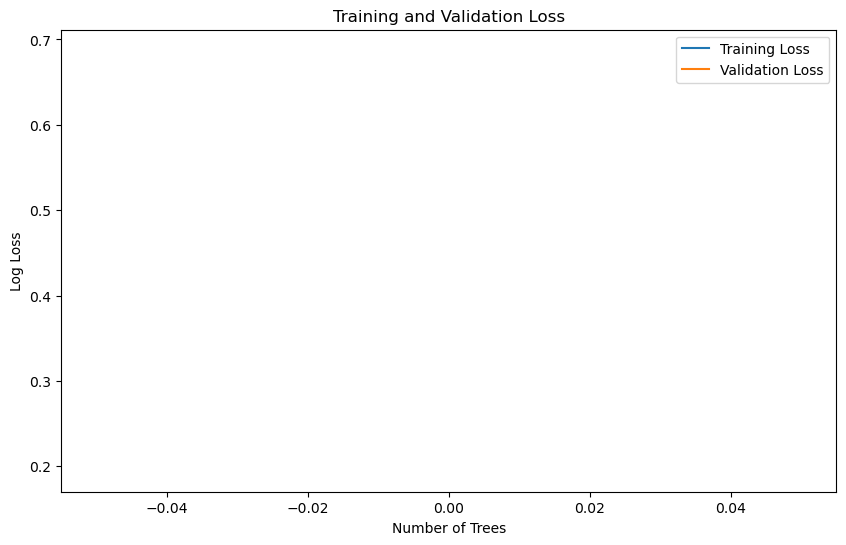

In [47]:

# Get training and validation loss
# train_loss = model.evals_result_['training']['multi_logloss']
# val_loss = model.evals_result_['validation']['multi_logloss']

train_loss = log_loss(y_train_temp, model.predict_proba(X_train))
val_loss = log_loss(y_val, model.predict_proba(X_val))

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import accuracy_score

# Train the model
model.fit(X_train, y_train_temp)

# Predictions
y_train_temp_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test) # accuracy = accuracy_score(y_test, y_pred)

# Calculate accuracy on training and validation set
train_accuracy = accuracy_score(y_train_temp, y_train_temp_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_acciracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Testing Accuracy: {test_acciracy}")


Training Accuracy: 1.0
Validation Accuracy: 0.7083333333333334
Testing Accuracy: 0.7083333333333334


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Splitting (80% training, 20% temp)
X_train_temp, X_val_test, y_train_temp, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting temp dataset (50% validation, 50% testing)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_temp)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [54]:
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [55]:
y_train = y_train_temp

In [64]:
X_train.shape

(188, 4353)

In [56]:
# Assuming X is your feature matrix and y is your target vector
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

train_sizes = np.linspace(0.1, 1.0, 10)
train_errors = []
val_errors = []

for train_size in train_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size)
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_subset, y_train_subset)
    
    train_predictions = model.predict(X_train_subset)
    val_predictions = model.predict(X_val)
    
    train_errors.append(1 - accuracy_score(y_train_subset, train_predictions))
    val_errors.append(1 - accuracy_score(y_val, val_predictions))

plt.plot(train_sizes, train_errors, label='Training error')
plt.plot(train_sizes, val_errors, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.title('Learning Curves for Random Forest')
plt.legend()
plt.show()

ValueError: train_size=1.0 should be either positive and smaller than the number of samples 188 or a float in the (0, 1) range

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is your target vector
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Generate train sizes as fractions, excluding 1.0 to avoid the error
train_sizes = np.linspace(0.1, 120, 20)
train_errors = []
val_errors = []



In [96]:
X_train.shape

(188, 4353)

In [97]:
y_train.shape

(188,)

In [2]:

# for train_size in train_sizes:
#     X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=0.8)#train_size)
#     model = RandomForestClassifier(n_estimators=100)
#     model.fit(X_train_subset, y_train_subset)
    
#     train_predictions = model.predict(X_train_subset)
#     val_predictions = model.predict(X_val)
    
#     train_errors.append(1 - accuracy_score(y_train_subset, train_predictions))
#     val_errors.append(1 - accuracy_score(y_val, val_predictions))

# plt.plot(train_sizes, train_errors, label='Training error')
# plt.plot(train_sizes, val_errors, label='Validation error')
# plt.xlabel('Training set size')
# plt.ylabel('Error')
# plt.title('Learning Curves for Random Forest')
# plt.legend()
# plt.show()

## Try this on April 1st

(236, 4364)


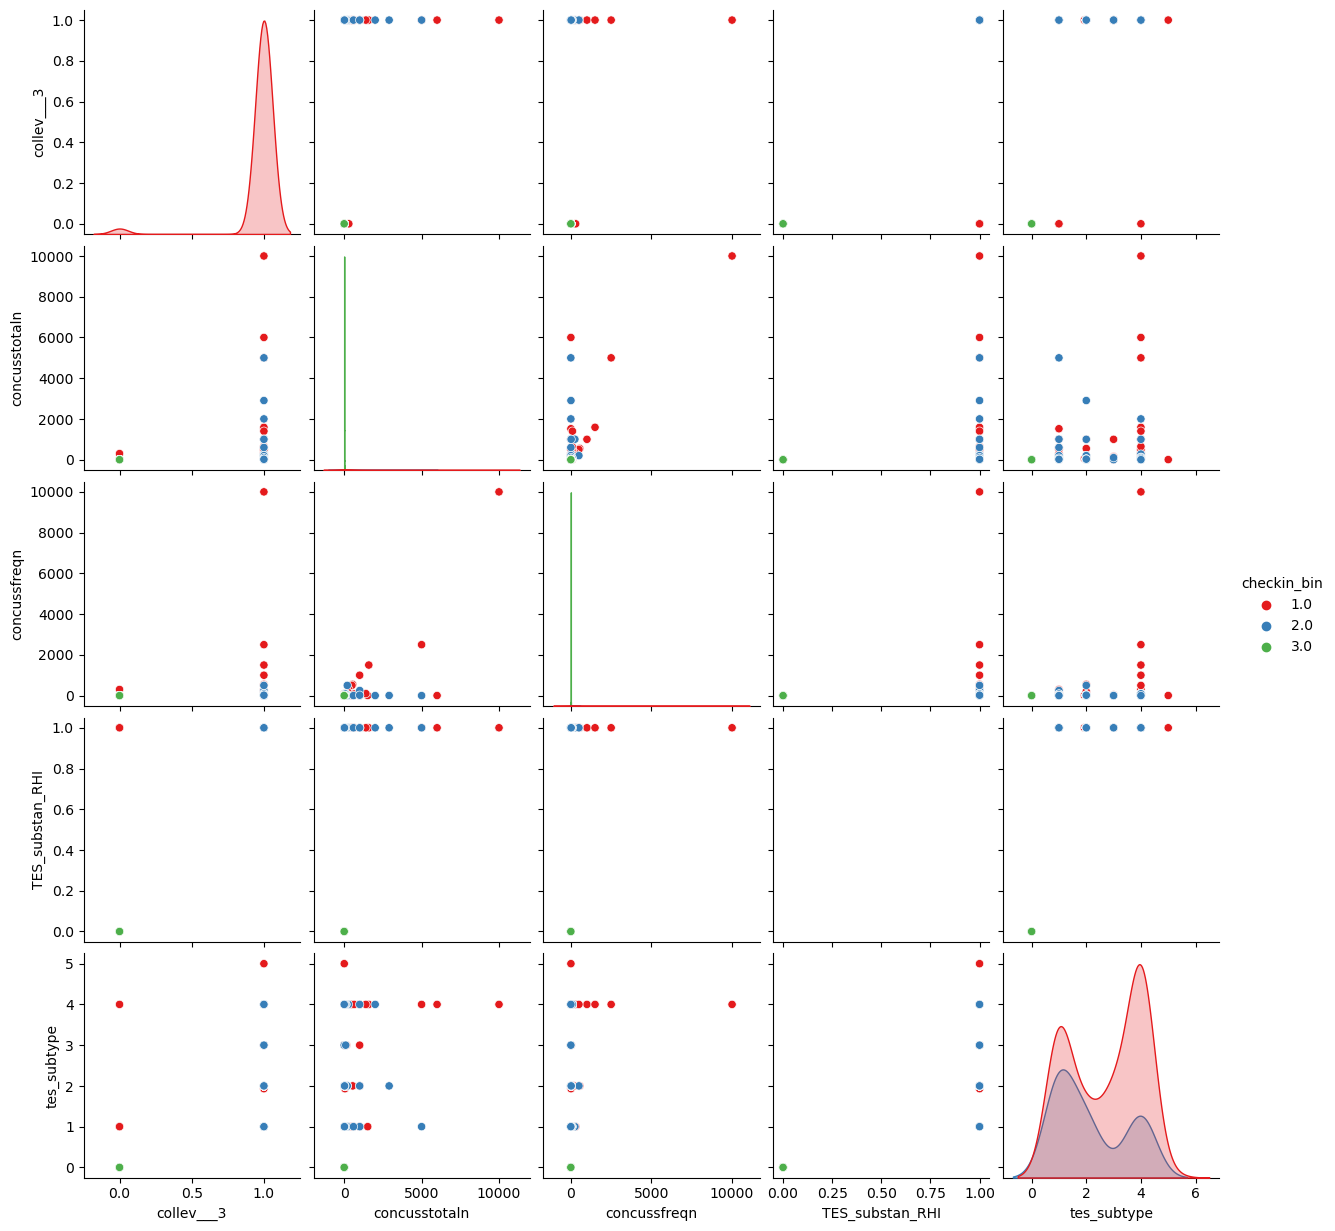

In [43]:
import seaborn as sns
print(combined_allFeatures.shape)
plot1 = combined_allFeatures.drop(columns=['subject_id'])
plot1 = combined_allFeatures [['checkin_bin','collev___3','concusstotaln','concussfreqn','TES_substan_RHI','tes_subtype']]
sns.pairplot(plot1,hue='checkin_bin',palette='Set1')

In [14]:
plot1.head()

,checkin_bin,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,DEM_AD8_ThinkMem,ad8tot,...,stroketiaepi,stroketiaagefirst,stroketiaagerec,stroketiaprob,stroketiaprobdes,endarter,endarterage,bp_systolic,bp_diastolic,rFSRP
0,1.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,117.0,82.0,0.01367
1,1.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,133.0,78.0,0.02836
2,1.0,1.0,1,1,1,0.0,0.0,1.0,1.0,6.0,...,.,.,.,.,NaN,0.0,.,135.0,79.0,0.04273
3,1.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,120.0,64.0,0.00905
4,1.0,1.0,1,1,0,0.0,0.0,0.0,1.0,4.0,...,.,.,.,.,NaN,0.0,.,132.0,85.0,0.00932


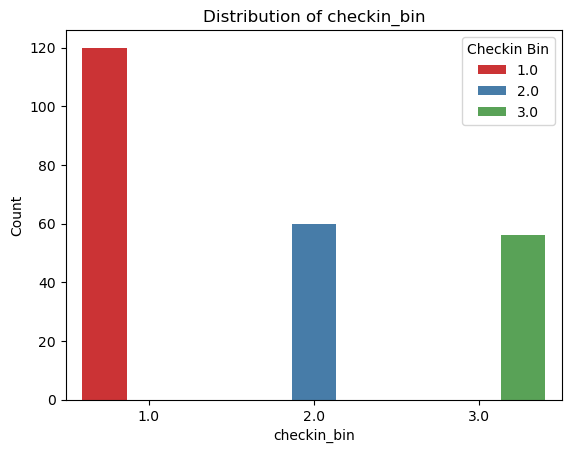

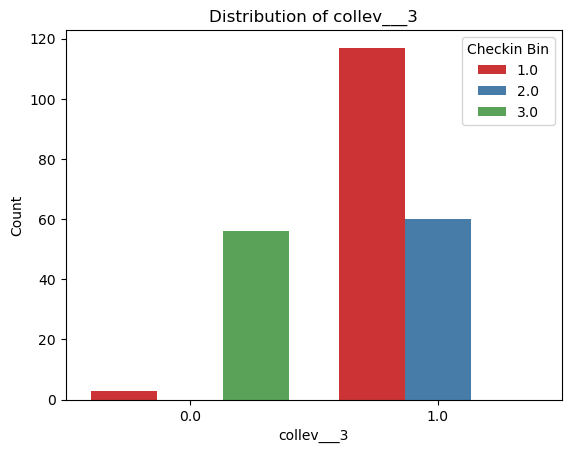

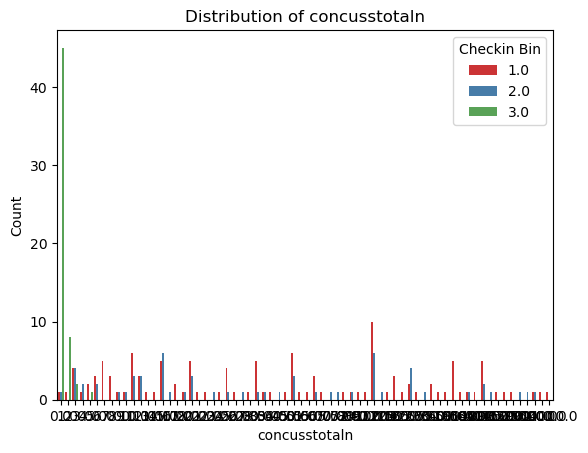

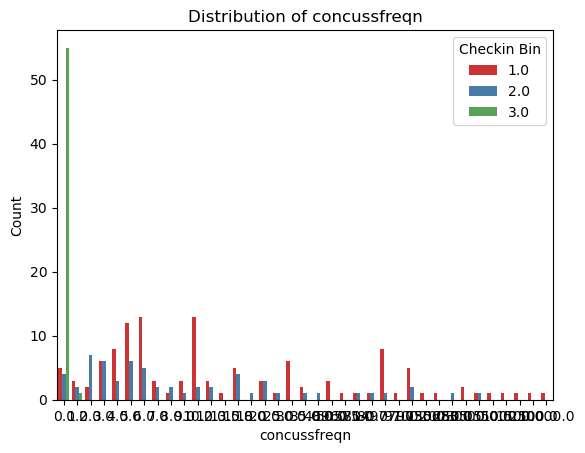

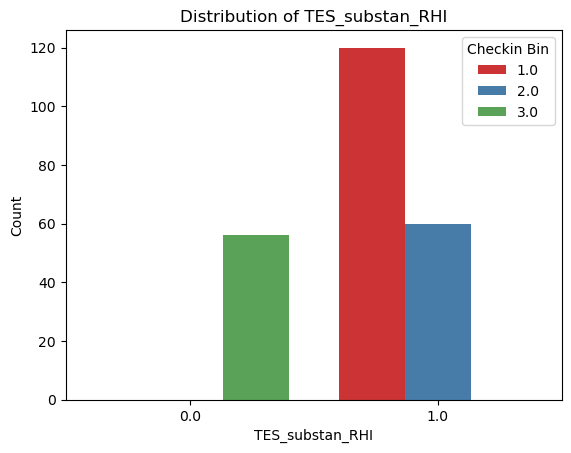

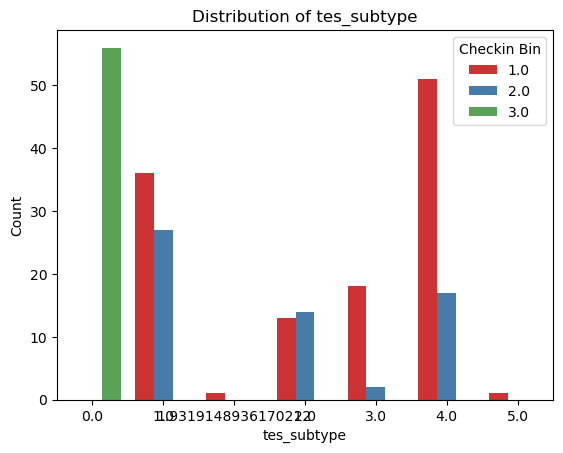

In [45]:
features_to_plot = ['checkin_bin','collev___3','concusstotaln','concussfreqn','TES_substan_RHI','tes_subtype']

for feature in features_to_plot:
    plt.figure#figsize=(8, 6))
    sns.countplot(x=feature, data=plot1, hue='checkin_bin', palette='Set1')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Checkin Bin')
    plt.show()

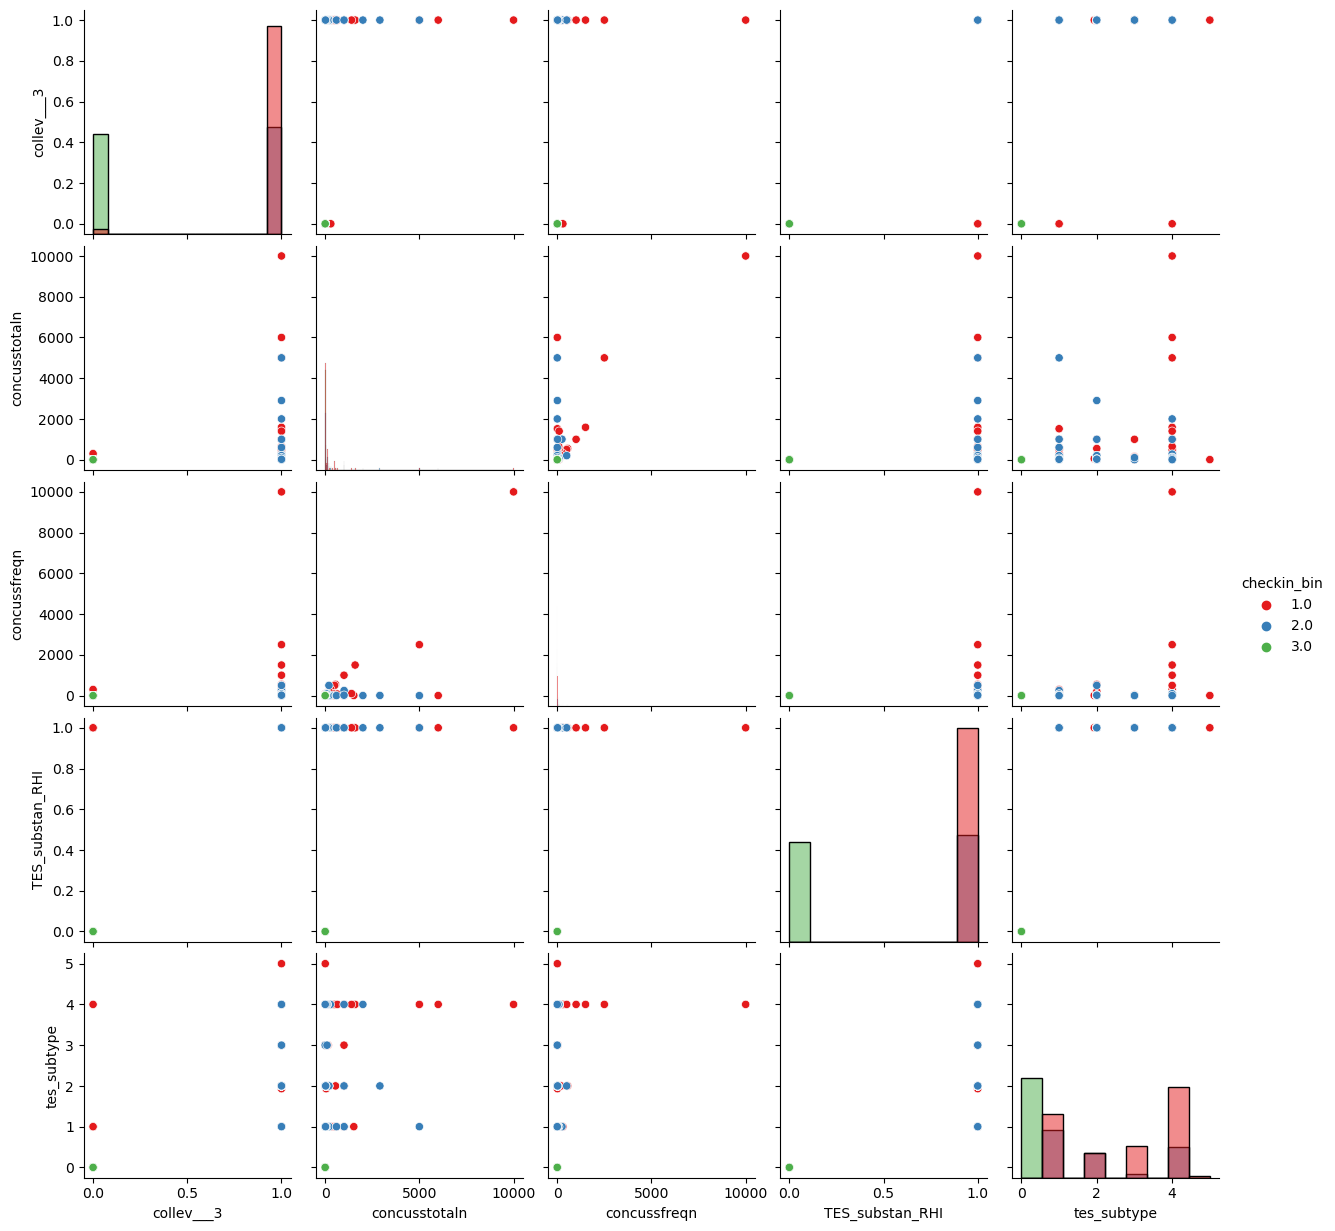

In [46]:
features_to_plot = ['checkin_bin','collev___3','concusstotaln','concussfreqn','TES_substan_RHI','tes_subtype']

sns.pairplot(plot1[features_to_plot], hue='checkin_bin', palette='Set1', diag_kind='hist')
plt.show()